In [5]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

# Load the dataset
file_path = "./dataset/CAC40_stocks_2021_2023.csv"
data = pd.read_csv(file_path)

# Data preprocessing
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)
data.set_index('Date', inplace=True)

# Feature selection
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

X = data[features]
y = data[target]

# Handle missing values
X.fillna(method='ffill', inplace=True)
y.fillna(method='ffill', inplace=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR(kernel='rbf', C=100, gamma=0.1)
}

# Train and evaluate models
print("Processed Dataset:")
print(data.head())

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}
    print(f"{name} - MSE: {mse:.4f}, R2: {r2:.4f}")

    # # Plot predictions as line charts with labeled axes
    # plt.figure(figsize=(10, 6))
    # plt.plot(y_test.index, y_test.values, label="Actual", color="blue", linestyle='-', linewidth=2)
    # plt.plot(y_test.index, y_pred, label="Predicted", color="red", linestyle='--', linewidth=2)
    # plt.title(f"{name} Predictions")
    # plt.xlabel("Date")
    # plt.ylabel("Stock Price")
    # plt.legend()
    # plt.grid(True)
    # plt.show()

# Fine-tuning Random Forest (example)

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10]
# }

# grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
# grid_search.fit(X_train_scaled, y_train)

# best_rf = grid_search.best_estimator_
# y_pred_rf = best_rf.predict(X_test_scaled)
# mse_rf = mean_squared_error(y_test, y_pred_rf)
# r2_rf = r2_score(y_test, y_pred_rf)

# print(f"Best Random Forest - MSE: {mse_rf:.4f}, R2: {r2_rf:.4f}")

# # Plot fine-tuned Random Forest predictions
# plt.figure(figsize=(10, 6))
# plt.plot(y_test.index, y_test.values, label="Actual", color="blue", linestyle='-', linewidth=2)
# plt.plot(y_test.index, y_pred_rf, label="Predicted", color="green", linestyle='--', linewidth=2)
# plt.title("Fine-Tuned Random Forest Predictions")
# plt.xlabel("Date")
# plt.ylabel("Stock Price")
# plt.legend()
# plt.grid(True)
# plt.show()

/tmp/ipykernel_17564/3143221013.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)
/tmp/ipykernel_17564/3143221013.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(method='ffill', inplace=True)
/tmp/ipykernel_17564/3143221013.py:32: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y.fillna(method='ffill', inplace=True)


Processed Dataset:
                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2020-04-08  28.559999  28.559999  26.639999  28.270000  28.270000  1051666.0   
2020-04-08  20.350000  21.170000  20.260000  21.170000  20.767323  3137785.0   
2020-04-08  73.620003  74.699997  70.860001  72.680000  66.954674   565191.0   
2020-04-08  82.500000  83.010002  80.930000  82.000000  73.638885  2481954.0   
2020-04-08  75.220001  77.160004  74.620003  77.160004  74.076416   485287.0   

             Stock  
Date                
2020-04-08   AC.PA  
2020-04-08  STM.PA  
2020-04-08   HO.PA  
2020-04-08  SAN.PA  
2020-04-08  CAP.PA  
Linear Regression - MSE: 4.0600, R2: 0.9999
Random Forest - MSE: 94.3285, R2: 0.9987
Support Vector Regression - MSE: 1004.4188, R2: 0.9867


Predictions for WLN.PA:
Linear Regression - MSE: 0.1247, R2: 0.9837


/tmp/ipykernel_17564/1938615123.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)
/tmp/ipykernel_17564/1938615123.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(method='ffill', inplace=True)
/tmp/ipykernel_17564/1938615123.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y.fillna(method='ffill', inplace=True)
/tmp/ipykernel_17564/1938615123.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

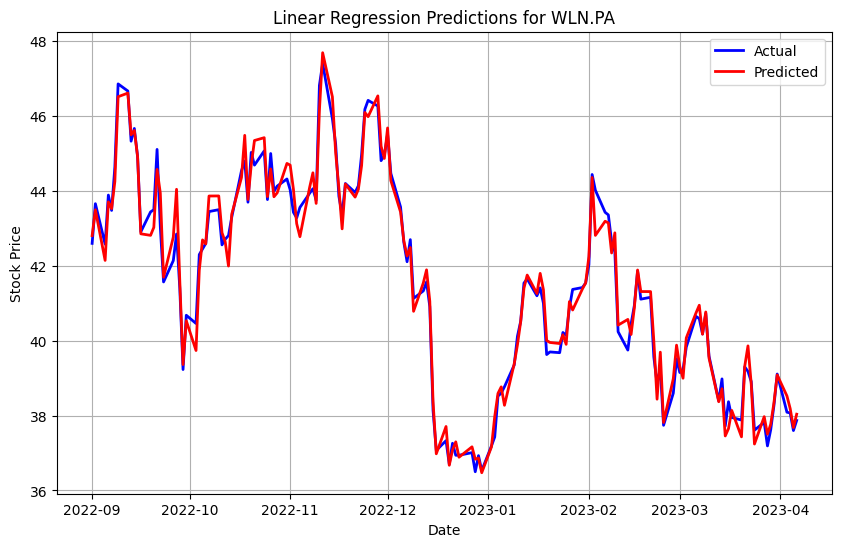

Random Forest - MSE: 0.2590, R2: 0.9661


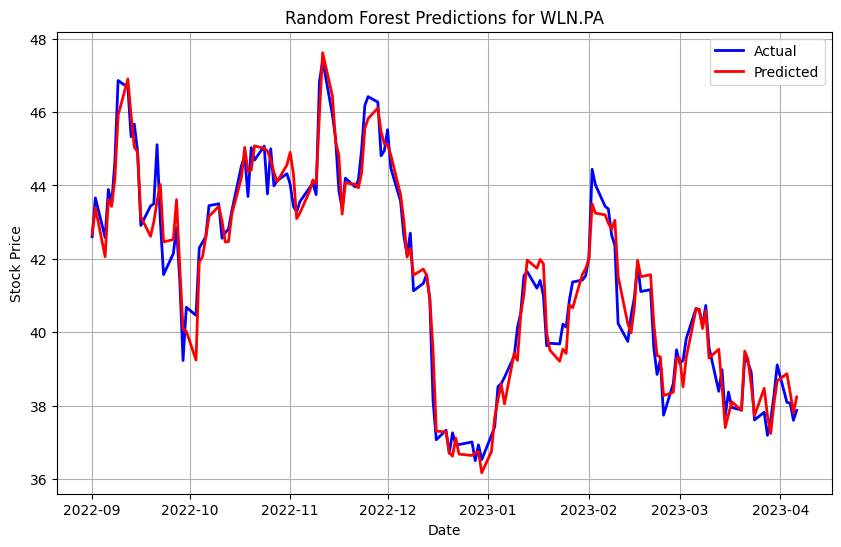

Support Vector Regression - MSE: 0.1375, R2: 0.9820


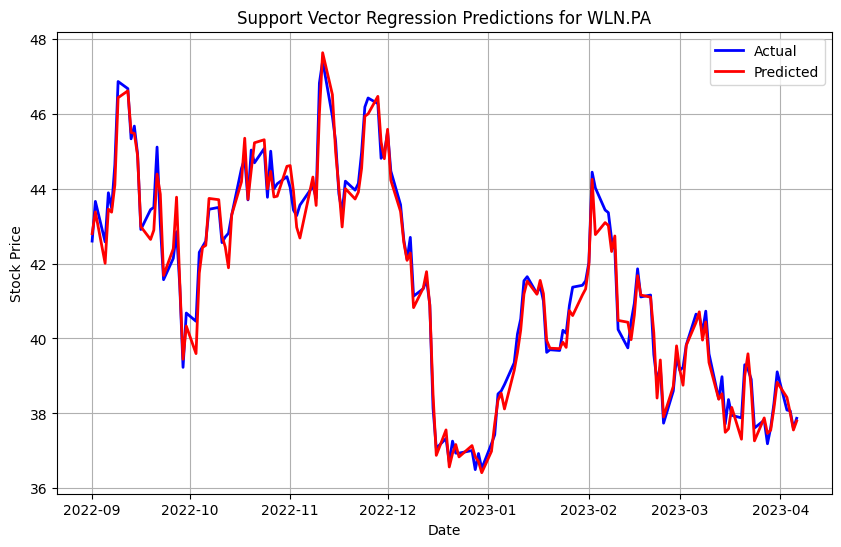

Predictions for AC.PA:
Linear Regression - MSE: 0.0321, R2: 0.9969


/tmp/ipykernel_17564/1938615123.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)
/tmp/ipykernel_17564/1938615123.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(method='ffill', inplace=True)
/tmp/ipykernel_17564/1938615123.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y.fillna(method='ffill', inplace=True)
/tmp/ipykernel_17564/1938615123.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

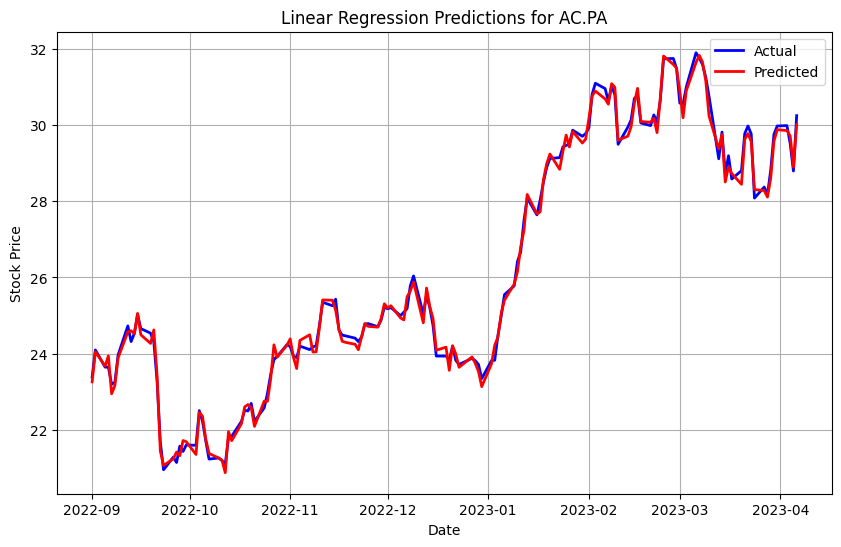

Random Forest - MSE: 0.0523, R2: 0.9949


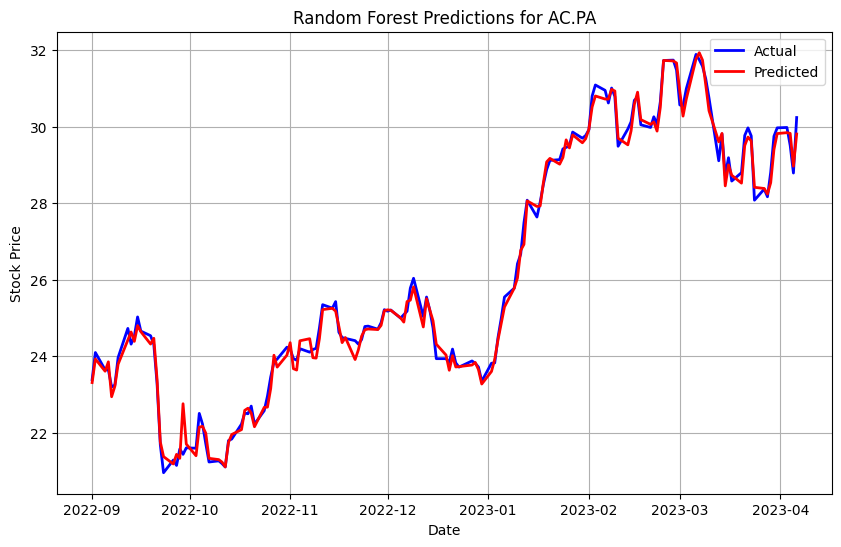

Support Vector Regression - MSE: 0.0333, R2: 0.9968


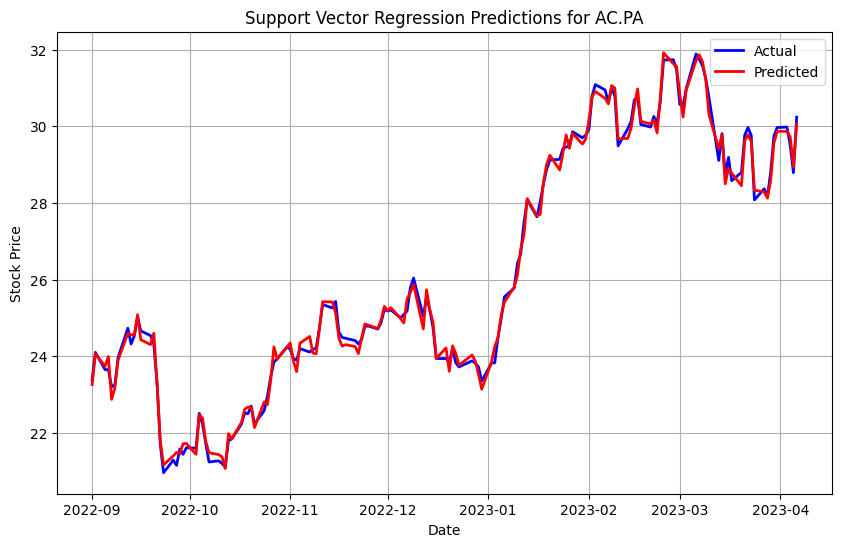

In [6]:
# Filter dataset for two specific stocks
selected_stocks = ['WLN.PA', 'AC.PA']  # Replace with actual stock identifiers
if 'Stock' in data.columns:  # Ensure the column exists
    for stock in selected_stocks:
        stock_data = data[data['Stock'] == stock]

        # Feature selection
        X = stock_data[features]
        y = stock_data[target]

        # Handle missing values
        X.fillna(method='ffill', inplace=True)
        y.fillna(method='ffill', inplace=True)

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

        # Standardize the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Train and evaluate models
        print(f"Predictions for {stock}:")
        for name, model in models.items():
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            print(f"{name} - MSE: {mse:.4f}, R2: {r2:.4f}")

            # Plot predictions as line charts with labeled axes
            plt.figure(figsize=(10, 6))
            plt.plot(y_test.index, y_test.values, label="Actual", color="blue", linestyle='-', linewidth=2)
            plt.plot(y_test.index, y_pred, label="Predicted", color="red", linestyle='-', linewidth=2)
            plt.title(f"{name} Predictions for {stock}")
            plt.xlabel("Date")
            plt.ylabel("Stock Price")
            plt.legend()
            plt.grid(True)
            plt.show()

Predictions for WLN.PA:
Linear Regression - MSE: 0.8431, R2: 0.8898


/tmp/ipykernel_17564/3896297168.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Lag_Close'] = stock_data['Close'].shift(1)
/tmp/ipykernel_17564/3896297168.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.dropna(inplace=True)  # Drop rows with NaN values caused by the lag


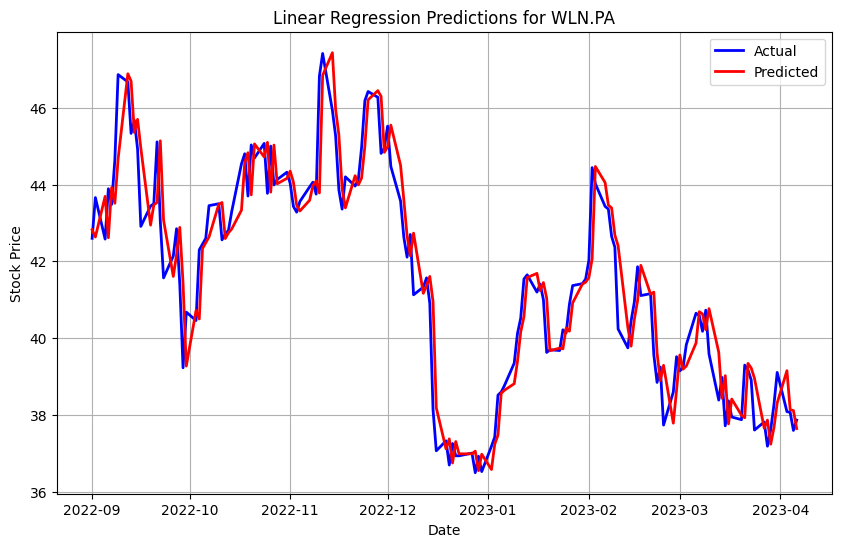

Random Forest - MSE: 1.7882, R2: 0.7662


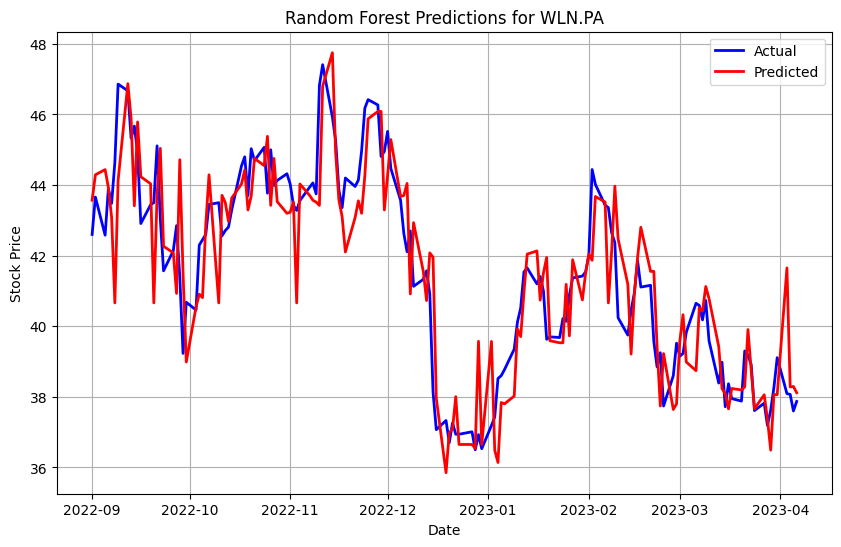

Support Vector Regression - MSE: 0.9109, R2: 0.8809


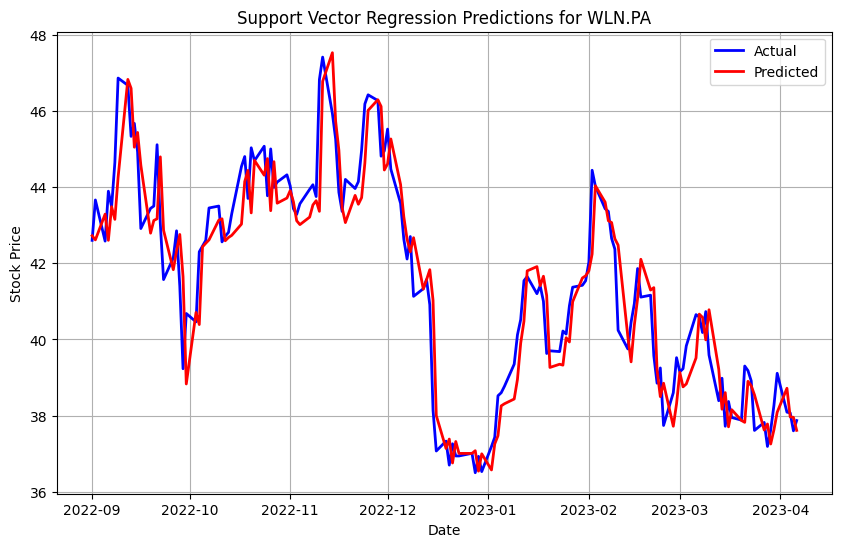

In [7]:
# Filter dataset for a specific stock
specific_stock = 'WLN.PA'  # Replace with the desired stock identifier
if 'Stock' in data.columns:  # Ensure the column exists
    stock_data = data[data['Stock'] == specific_stock]

    # Create lagged features (use previous day's data to predict the next day's price)
    stock_data['Lag_Close'] = stock_data['Close'].shift(1)
    stock_data.dropna(inplace=True)  # Drop rows with NaN values caused by the lag

    # Feature selection
    features = ['Lag_Close']  # Use the lagged close price as the feature
    target = 'Close'  # Predict the close price
    X = stock_data[features]
    y = stock_data[target]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

    # Train and evaluate models
    print(f"Predictions for {specific_stock}:")
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"{name} - MSE: {mse:.4f}, R2: {r2:.4f}")

        # Plot predictions as line charts with labeled axes
        plt.figure(figsize=(10, 6))
        plt.plot(y_test.index, y_test.values, label="Actual", color="blue", linestyle='-', linewidth=2)
        plt.plot(y_test.index, y_pred, label="Predicted", color="red", linestyle='-', linewidth=2)
        plt.title(f"{name} Predictions for {specific_stock}")
        plt.xlabel("Date")
        plt.ylabel("Stock Price")
        plt.legend()
        plt.grid(True)
        plt.show()

                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2020-04-08  28.559999  28.559999  26.639999  28.270000  28.270000  1051666.0   
2020-04-09  28.629999  29.570000  28.049999  28.639999  28.639999   990955.0   
2020-04-14  28.010000  28.340000  27.150000  27.590000  27.590000   907178.0   
2020-04-15  27.170000  27.299999  25.459999  25.660000  25.660000  1378290.0   
2020-04-16  25.879999  26.700001  24.080000  24.570000  24.570000  1474307.0   

            Stock  
Date               
2020-04-08  AC.PA  
2020-04-09  AC.PA  
2020-04-14  AC.PA  
2020-04-15  AC.PA  
2020-04-16  AC.PA  
Recursive Prediction - MSE: 0.5432, R2: -0.0335


/home/abel/personnal_projects/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/abel/personnal_projects/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


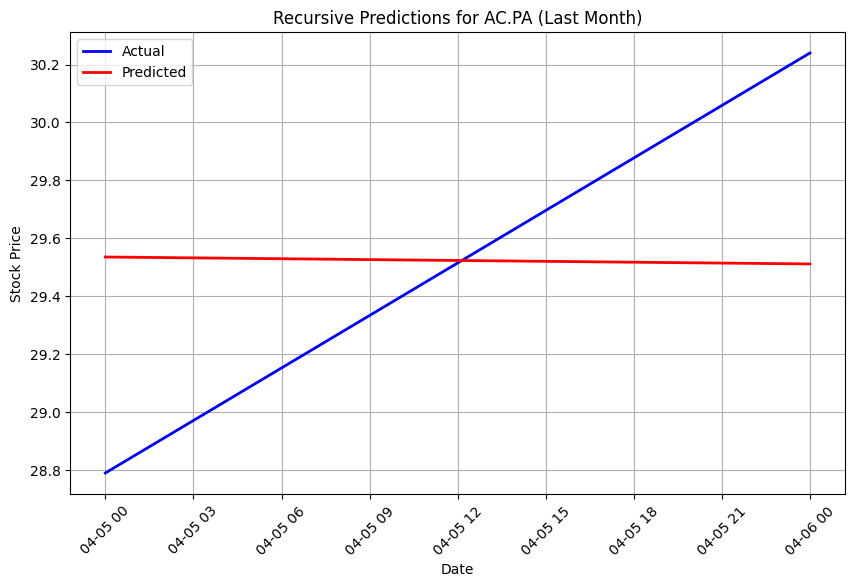

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Charger le dataset
file_path = "./dataset/CAC40_stocks_2021_2023.csv"
data = pd.read_csv(file_path)

# Prétraitement des données
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)
data.set_index('Date', inplace=True)

# Filtrer les données pour un stock spécifique
specific_stock = 'AC.PA'  # Remplacez par le nom du stock souhaité
if 'Stock' in data.columns:  # Vérifiez que la colonne existe
    data = data[data['Stock'] == specific_stock]

print(data.head())

# Créer des caractéristiques décalées
data.dropna(inplace=True)  # Supprimer les lignes avec des valeurs NaN

# Séparer le dernier mois pour la prédiction
last_day = data.index[-2:]
train_data = data[~data.index.isin(last_day)]
test_data = data[data.index.isin(last_day)]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Sélection des caractéristiques et de la cible
X_train = train_data[['Open']]
y_train = train_data['Close']
X_test = test_data[['Open']]
y_test = test_data['Close']

# Entraîner le modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédire récursivement pour le dernier mois
predictions = []
last_close = X_test.iloc[0, 0]  # Première valeur de Lag_Close dans le test

for _ in range(len(X_test)):
    pred = model.predict([[last_close]])[0]
    predictions.append(pred)
    last_close = pred  # Utiliser la prédiction comme entrée pour le jour suivant

# Évaluer les performances
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Recursive Prediction - MSE: {mse:.4f}, R2: {r2:.4f}")

# Visualiser les résultats
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test.values, label="Actual", color="blue", linestyle='-', linewidth=2)
plt.plot(y_test.index, predictions, label="Predicted", color="red", linestyle='-', linewidth=2)
plt.title(f"Recursive Predictions for {specific_stock} (Last Month)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.xticks(rotation=45)  # Faire pivoter les étiquettes de l'axe x pour une meilleure lisibilité
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

# Load the dataset
file_path = "./dataset/CAC40_stocks_2021_2023.csv"
data = pd.read_csv(file_path)

# Data preprocessing
specific_stock = 'AC.PA'  # Remplacez par le nom du stock souhaité
if 'Stock' in data.columns:  # Vérifiez que la colonne existe
    data = data[data['Stock'] == specific_stock]
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)
data.set_index('Date', inplace=True)

data.dropna(inplace=True)

# Feature selection
features = 'Open'
target = 'Close'

X = data[features]
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Models
models = { 
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR(kernel='rbf', C=100, gamma=0.1)
}

# Train and evaluate models
print("Processed Dataset:")
print(data.head())

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}
    print(f"{name} - MSE: {mse:.4f}, R2: {r2:.4f}")

    # # Plot predictions as line charts with labeled axes
    # plt.figure(figsize=(10, 6))
    # plt.plot(y_test.index, y_test.values, label="Actual", color="blue", linestyle='-', linewidth=2)
    # plt.plot(y_test.index, y_pred, label="Predicted", color="red", linestyle='--', linewidth=2)
    # plt.title(f"{name} Predictions")
    # plt.xlabel("Date")
    # plt.ylabel("Stock Price")
    # plt.legend()
    # plt.grid(True)
    # plt.show()

# Fine-tuning Random Forest (example)

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10]
# }

# grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
# grid_search.fit(X_train_scaled, y_train)

# best_rf = grid_search.best_estimator_
# y_pred_rf = best_rf.predict(X_test_scaled)
# mse_rf = mean_squared_error(y_test, y_pred_rf)
# r2_rf = r2_score(y_test, y_pred_rf)

# print(f"Best Random Forest - MSE: {mse_rf:.4f}, R2: {r2_rf:.4f}")

# # Plot fine-tuned Random Forest predictions
# plt.figure(figsize=(10, 6))
# plt.plot(y_test.index, y_test.values, label="Actual", color="blue", linestyle='-', linewidth=2)
# plt.plot(y_test.index, y_pred_rf, label="Predicted", color="green", linestyle='--', linewidth=2)
# plt.title("Fine-Tuned Random Forest Predictions")
# plt.xlabel("Date")
# plt.ylabel("Stock Price")
# plt.legend()
# plt.grid(True)
# plt.show()

Processed Dataset:
                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2020-04-08  28.559999  28.559999  26.639999  28.270000  28.270000  1051666.0   
2020-04-09  28.629999  29.570000  28.049999  28.639999  28.639999   990955.0   
2020-04-14  28.010000  28.340000  27.150000  27.590000  27.590000   907178.0   
2020-04-15  27.170000  27.299999  25.459999  25.660000  25.660000  1378290.0   
2020-04-16  25.879999  26.700001  24.080000  24.570000  24.570000  1474307.0   

            Stock  
Date               
2020-04-08  AC.PA  
2020-04-09  AC.PA  
2020-04-14  AC.PA  
2020-04-15  AC.PA  
2020-04-16  AC.PA  


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.